In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns
import sys

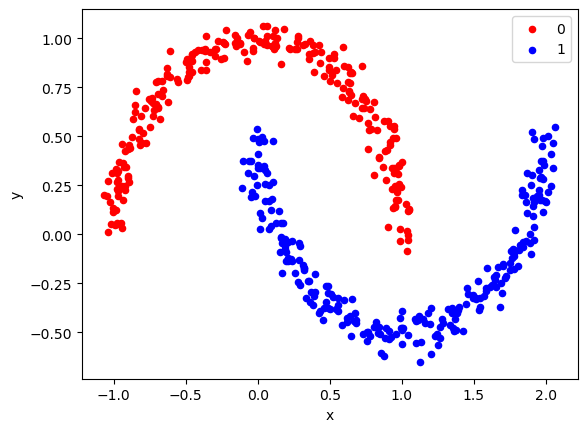

In [2]:
X, y = make_moons(n_samples=500, noise=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True)

df = pd.DataFrame(dict(x=X[:,0], y = X[:,1], label = y))

colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')

fig, ax = plt.subplots()
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
plt.show()

In [3]:
import torch
from torch import nn
import torch.optim as optim

In [4]:
# Defining layers using torch's atomic operations
class CustomLinear(nn.Module):
    def __init__(self, _in, _out):
        super().__init__()
        
        self._in = _in
        self._out = _out
        
        # We want to implement the Linear transformation: Z = W * X + B
        
        # W: _in is the feature vector size (n). We need weights with shape (m x n), where m is number of neuron
        weight = torch.Tensor(_out, _in)
        self.weight = nn.Parameter(weight) # register weights as network parameters
        
        # B: Bias with shape (1 x m)
        bias = torch.Tensor(_out)
        self.bias = nn.Parameter(bias) # register bias as network parameters
        
        # Initialze weights (W) and biases (B)
        torch.nn.init.uniform_(self.weight, -1, 1)
        torch.nn.init.uniform_(self.bias, -1, 1)
        
    def __repr__(self):
        return f"CustomLinear(in_features={self._in}, out_features={self._out}, bias=VeryBiasedBehavior)"
    
    def forward(self, x: torch.tensor):
        z = torch.matmul(x, self.weight.t())
        z = torch.add(z, self.bias)
        return z 
    

In [5]:
class CustomSigmoid(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        return 1/ (1 + (torch.exp(-x)))

In [6]:
# Vanilla Neural Network with custom layers
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            CustomLinear(2,8),
            CustomSigmoid(),
            CustomLinear(8, 8),
            CustomSigmoid(),
            CustomLinear(8, 1),
            CustomSigmoid(),
        )

    def forward(self, x):
        logits = self.model(x)

        return logits

In [7]:
model = NeuralNetwork().to('cpu')
print(model)

NeuralNetwork(
  (model): Sequential(
    (0): CustomLinear(in_features=2, out_features=8, bias=VeryBiasedBehavior)
    (1): CustomSigmoid()
    (2): CustomLinear(in_features=8, out_features=8, bias=VeryBiasedBehavior)
    (3): CustomSigmoid()
    (4): CustomLinear(in_features=8, out_features=1, bias=VeryBiasedBehavior)
    (5): CustomSigmoid()
  )
)


In [8]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.5336,  0.1918],
         [-0.9965,  0.5746],
         [-0.1601, -0.6754],
         [ 0.3638, -0.3590],
         [ 0.5625,  0.2262],
         [-0.7291,  0.9980],
         [-0.5119, -0.7379],
         [-0.6069, -0.5166]], requires_grad=True),
 Parameter containing:
 tensor([ 0.5490, -0.7480,  0.0810,  0.2902,  0.0981, -0.7400, -0.0293,  0.9656],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.2070, -0.0366, -0.8438, -0.9866, -0.9250,  0.9664,  0.9224, -0.8247],
         [ 0.5474, -0.8455, -0.5591,  0.1886,  0.4437,  0.7223, -0.3586, -0.4159],
         [-0.3005, -0.9897, -0.3301, -0.0950, -0.9223, -0.8465, -0.7403,  0.6875],
         [ 0.3084,  0.8716, -0.1616, -0.6057, -0.9670, -0.4765,  0.0226, -0.9183],
         [-0.2883,  0.9753, -0.9266,  0.2616,  0.2408, -0.0193,  0.8332,  0.9077],
         [ 0.2983,  0.2742,  0.4776,  0.3969,  0.6186, -0.8332,  0.3123,  0.8260],
         [-0.3020, -0.8129, -0.2842, -0.3781,  0.2146,  0.0964,  0.2

In [9]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.2)

In [10]:
# Convert test data in numpy array to torch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32, requires_grad = True)
y_train_t = torch.tensor(y_train, dtype=torch.float32, requires_grad = True)

y_train_t = y_train_t.unsqueeze(1)

In [11]:
# Training loop
n_epochs = 150
for epoch in range(n_epochs):
    
    # Forward pass
    y_pred = model.forward(X_train_t)
    
    model.parameters()
    
    loss = criterion(y_pred, y_train_t)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # Evaluation
    print(loss)

tensor(0.7095, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7676, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6661, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6365, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6201, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5618, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5002, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4488, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4051, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3728, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3542, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3429, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3318, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3186, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3035, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2879, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2794, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2888, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2932, grad_fn=<Bina

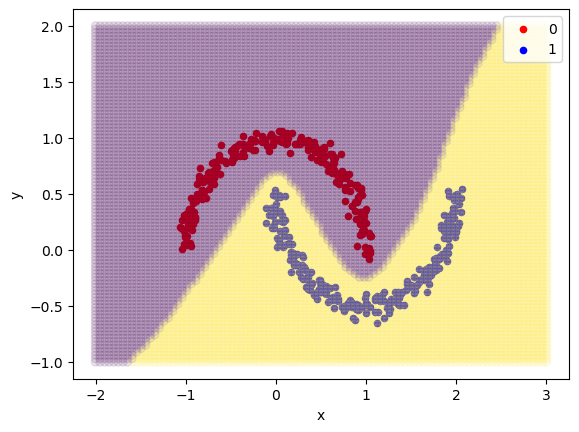

In [12]:
X, Y = np.mgrid[-2:3:100j,-1:2:100j]
X = X.flatten()
Y = Y.flatten()

# Visualize decision boundary 
colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')

fig, ax = plt.subplots()
prediction = [1 if model.forward(torch.tensor([x,y], dtype=torch.float32)) > 0.8 else 0 for x, y in zip(X,Y)]
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])

ax.scatter(X, Y, alpha = 0.1, c = prediction)
plt.show()
